In [595]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
import numpy as np
import datetime
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline
#from scipy import stats

import plotly.graph_objects as go
sns.set_context('paper', font_scale=1.4)

In [596]:
df = pd.read_csv('data.csv', parse_dates=[0])

continents = ['Africa', 'America', 'Asia', 'Oceania', 'Europe']

df = df.rename(columns = {"dateRep": "date"})
df = df.rename(columns = {"continentExp": "continent"})
df = df.rename(columns = {"countriesAndTerritories": "country"})

df = df.drop(columns=['geoId', 'countryterritoryCode', 'day', 'month', 'year'])

#df.index = pd.to_datetime(df.index)
#df.set_index('date', inplace=True)
#print(df.index.min(), df.index.max())
print(df['date'].min(),df['date'].max())

2019-12-31 00:00:00 2020-12-05 00:00:00


In [597]:
df.dtypes

date           datetime64[ns]
cases                   int64
deaths                  int64
country                object
popData2018           float64
continent              object
dtype: object

In [598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18412 entries, 0 to 18411
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         18412 non-null  datetime64[ns]
 1   cases        18412 non-null  int64         
 2   deaths       18412 non-null  int64         
 3   country      18412 non-null  object        
 4   popData2018  18171 non-null  float64       
 5   continent    18412 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 863.2+ KB


In [599]:
df.sample(15)

,date,cases,deaths,country,popData2018,continent
2650,2020-02-04,2,0,Brunei_Darussalam,4.289620e+05,Asia
10617,2020-03-18,120,2,Malaysia,3.152858e+07,Asia
17330,2020-05-20,873,3,United_Arab_Emirates,9.630959e+06,Asia
7998,2020-06-02,0,0,India,1.352617e+09,Asia
14946,2020-05-20,0,0,Seychelles,9.676200e+04,Africa
5992,2020-03-18,47,0,Finland,5.518050e+06,Europe
13867,2020-05-16,1153,0,Qatar,2.781677e+06,Asia
17359,2020-04-21,484,2,United_Arab_Emirates,9.630959e+06,Asia
9662,2020-04-21,22,0,Kyrgyzstan,6.315800e+06,Asia
4079,2020-04-29,8,4,Croatia,4.089400e+06,Europe


In [600]:
df.columns

Index(['date', 'cases', 'deaths', 'country', 'popData2018', 'continent'], dtype='object')

In [601]:
df.describe()

,cases,deaths,popData2018
count,18412.000000,18412.000000,1.817100e+04
mean,269.442483,17.809255,5.114234e+07
std,1695.275537,124.850076,1.750804e+08
min,-2461.000000,0.000000,1.000000e+03
25%,0.000000,0.000000,2.254126e+06
50%,2.000000,0.000000,9.630959e+06
75%,40.000000,1.000000,3.602914e+07
max,48529.000000,4928.000000,1.392730e+09


In [602]:
#Set colors for graphs

sns.set_palette('husl')

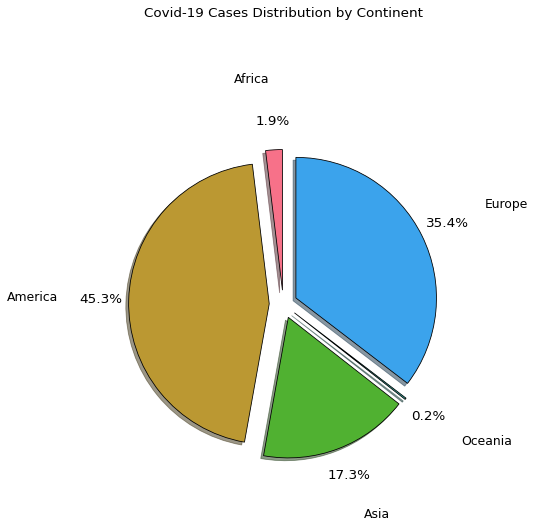

In [603]:
#Group cases by Continent and get totals


plt.figure(figsize=(8,8))

tot_cases = []

africa_cases = df.groupby('continent')['cases'].sum()['Africa']
america_cases = df.groupby('continent')['cases'].sum()['America']
asia_cases = df.groupby('continent')['cases'].sum()['Asia']
europe_cases = df.groupby('continent')['cases'].sum()['Europe']
oceania_cases = df.groupby('continent')['cases'].sum()['Oceania']

tot_cases.extend([africa_cases, america_cases, asia_cases, oceania_cases, europe_cases])

explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.pie(tot_cases, labels =continents, explode=explode,
        shadow= True, startangle=90, autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.5,
        wedgeprops={'edgecolor': 'black'})



plt.title("Covid-19 Cases Distribution by Continent", y=1.3)
plt.tight_layout()
#plt.savefig('continent_pie.png', dpi=300)
plt.show()


Text(0.5, 0.98, 'Continent Cases per Day')

<Figure size 432x288 with 0 Axes>

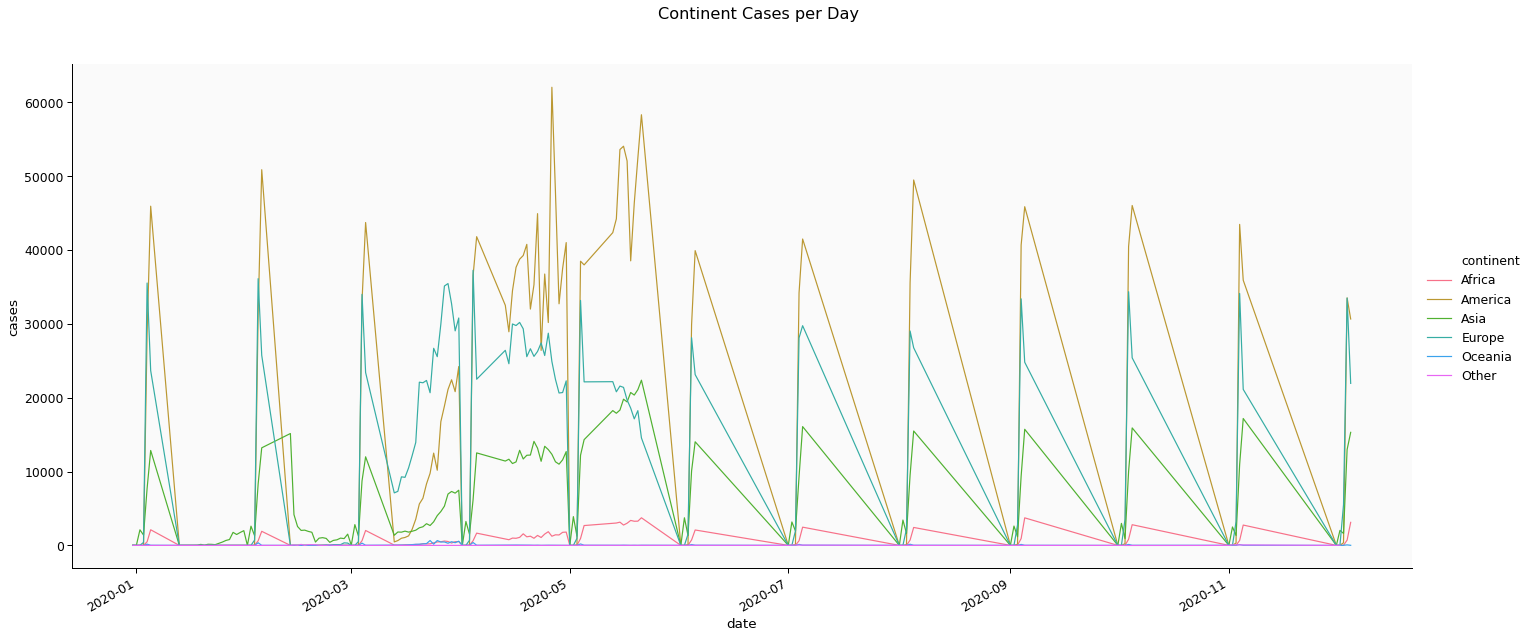

In [645]:
df_cases = df.groupby(['date', 'continent'])[['cases', 'deaths']].sum().reset_index()
#print(df_cases)

# Show continent cases per day

plt.tight_layout()
g = sns.relplot(x='date', y='cases', hue='continent', kind='line', height=10, aspect=2, data=df_cases)
g.fig.autofmt_xdate()

# Set Title, distance from top
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Continent Cases per Day')

Text(0.5, 0.98, 'Relationship Between Cases and Deaths')

<Figure size 432x288 with 0 Axes>

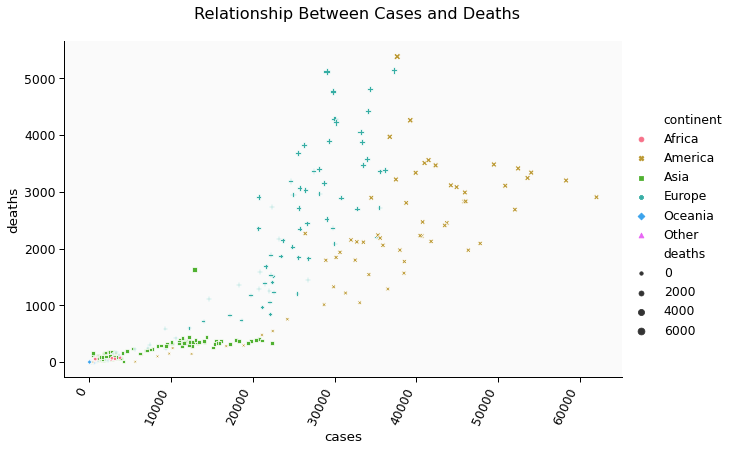

In [642]:
# Plot the Relationship Between Cases and Deaths

#plt.title('Relationship Between Cases and Deaths')

plt.tight_layout()
gg = sns.relplot(x='cases', y='deaths', hue='continent', size='deaths', style='continent', height=6, aspect=1.5, data=df_cases)

# Rotate x ticks
gg.set_xticklabels(rotation=65, horizontalalignment='right')

# Set Title, distance from top
plt.subplots_adjust(top=0.9)
gg.fig.suptitle('Relationship Between Cases and Deaths')

In [561]:
#plt.figure(figsize=(20,9))
#plt.tight_layout()
#df.plot.scatter(x='cases', y='deaths', c='c' , s=15)


In [ ]:
#time_series = df.pivot_table(index='date',columns='continent', values='cases', aggfunc=sum)